In [1]:
import pandas as pd
import numpy as np
import pickle
import re
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df['Type']=df['Type'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

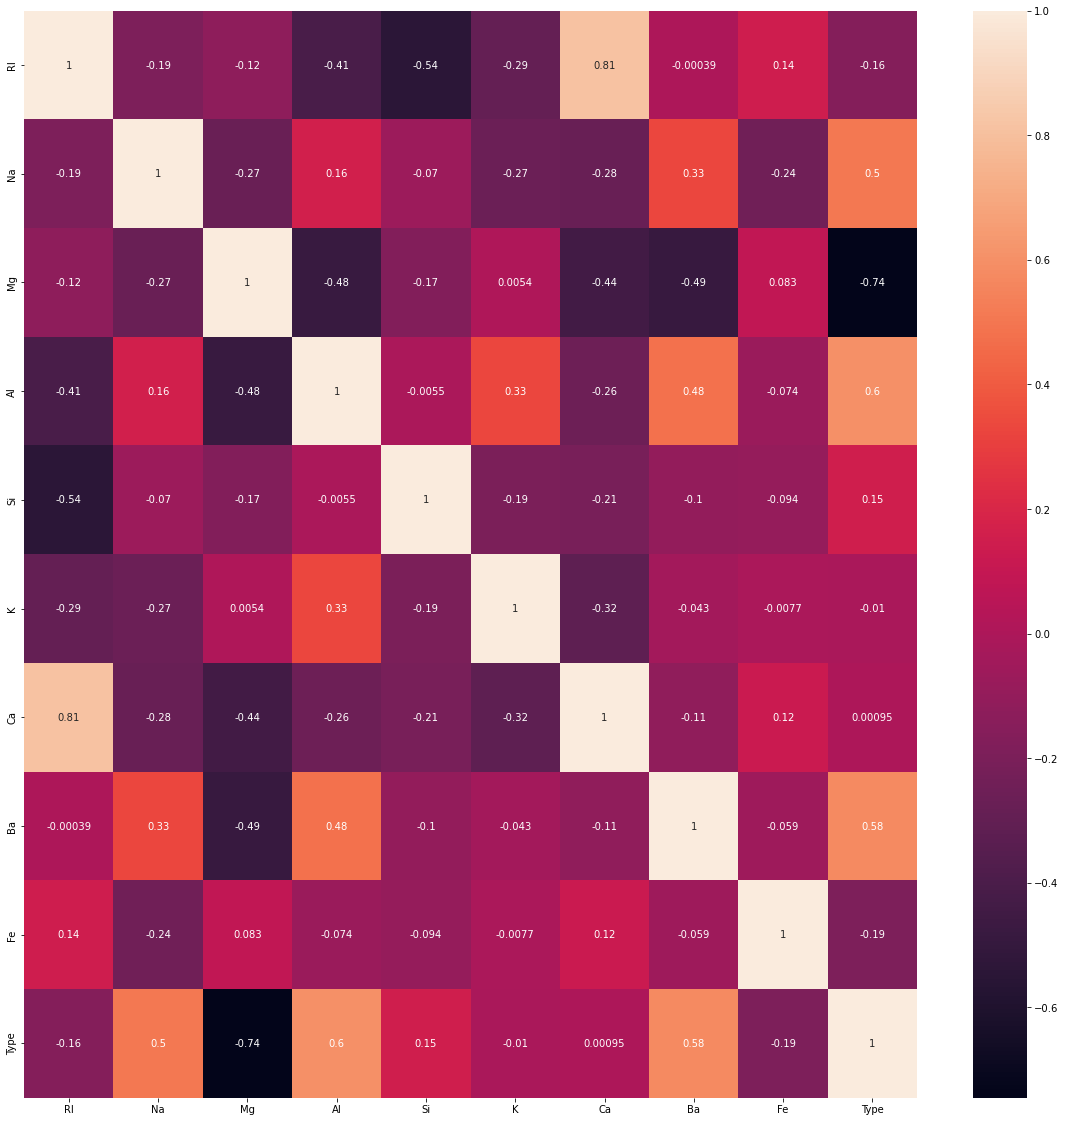

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [18]:
df.drop(['Ca','K'],axis=1,inplace=True)

KeyError: "['Ca', 'K'] not found in axis"

In [19]:
df.drop(['Si'],axis=1,inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Ba      214 non-null    float64
 5   Fe      214 non-null    float64
 6   Type    214 non-null    float64
dtypes: float64(7)
memory usage: 11.8 KB


In [21]:
x=df.drop('Type',axis=1)

In [22]:
y=df['Type']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

In [24]:
df['Type'].value_counts()

2.0    76
1.0    70
7.0    29
3.0    17
5.0    13
6.0     9
Name: Type, dtype: int64

In [25]:
log=LogisticRegression(multi_class='ovr')

In [26]:
log.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [27]:
y_pred_test=log.predict(x_test)

In [28]:
accu_score=accuracy_score(y_test,y_pred_test)
accu_score

0.6111111111111112

In [29]:
file=open('glasslog.pkl','wb')
pickle.dump(log,file)
file.close()

In [30]:
x

,RI,Na,Mg,Al,Ba,Fe
0,1.52101,13.64,4.49,1.10,0.00,0.0
1,1.51761,13.89,3.60,1.36,0.00,0.0
2,1.51618,13.53,3.55,1.54,0.00,0.0
3,1.51766,13.21,3.69,1.29,0.00,0.0
4,1.51742,13.27,3.62,1.24,0.00,0.0
...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,1.06,0.0
210,1.51685,14.92,0.00,1.99,1.59,0.0
211,1.52065,14.36,0.00,2.02,1.64,0.0
212,1.51651,14.38,0.00,1.94,1.57,0.0
